In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter
import importlib
import networkx as nx
import nx_parallel as nxp
import numpy.random as npr
from itertools import product

import sys
import os
core_dir = os.path.join(os.getcwd(), '../..', 'nomad')
core_dir = os.path.normpath(core_dir)
sys.path.append(core_dir)

import mobility_model as mmod
from mobility_model import Building, Street, City, Agent, Population
import sampler
import stop_detection as sd
from constants import DEFAULT_SPEEDS, FAST_SPEEDS, SLOW_SPEEDS, DEFAULT_STILL_PROBS
from constants import FAST_STILL_PROBS, SLOW_STILL_PROBS, ALLOWED_BUILDINGS

import pdb

In [2]:
pd.options.mode.chained_assignment = None

# Initialization of city and population

In [4]:
# from shapely.geometry import box

# # Initialize city
# city = City(dimensions=(22, 22))

# # add park
# city.add_building('park', (13, 11), bbox=box(9, 9, 13, 13))

# # add homes
# city.add_building('home', (8, 8), [(7, 7), (7, 8)])
# city.add_building('home', (9, 8), [(8, 7), (9, 7)])
# city.add_building('home', (10, 8), [(10, 7)])
# city.add_building('home', (11, 8), [(11, 7)])
# city.add_building('home', (13, 6), [(13, 7)])
# city.add_building('home', (14, 6), [(14, 7)])
# city.add_building('home', (13, 8), [(14, 8)])
# city.add_building('home', (13, 9), [(14, 9)])
# city.add_building('home', (13, 11), [(14, 11)])
# city.add_building('home', (13, 12), [(14, 12)])
# city.add_building('home', (15, 13), [(14, 13)])
# city.add_building('home', (13, 13), [(13, 14), (14, 14)])
# city.add_building('home', (12, 13), [(12, 14)])
# city.add_building('home', (11, 13), [(11, 14)])
# city.add_building('home', (9, 13), [(9, 14)])
# city.add_building('home', (8, 13), [(8, 14)])
# city.add_building('home', (7, 15), [(7, 14)])
# city.add_building('home', (6, 13), [(7, 13)])
# city.add_building('home', (8, 12), [(7, 12)])
# city.add_building('home', (8, 10), [(7, 10), (7, 9)])

# # add workplaces
# city.add_building('work', (3, 4), [(4, 4), (4, 5)])
# city.add_building('work', (5, 3), [(5, 4), (5, 5)])
# city.add_building('work', (6, 6), bbox=box(6, 4, 8, 6))
# city.add_building('work', (8, 6), bbox=box(8, 4, 10, 6))
# city.add_building('work', (12, 6), bbox=box(11, 5, 14, 6))
# city.add_building('work', (12, 3), bbox=box(11, 4, 14, 5))
# city.add_building('work', (15, 3), bbox=box(14, 4, 17, 6))
# city.add_building('work', (18, 4), bbox=box(17, 4, 18, 6))
# city.add_building('work', (18, 6), bbox=box(16, 6, 18, 8))
# city.add_building('work', (15, 9), bbox=box(16, 8, 17, 10))
# city.add_building('work', (18, 8), bbox=box(17, 8, 18, 10))
# city.add_building('work', (18, 10), bbox=box(16, 10, 18, 12))
# city.add_building('work', (18, 13), bbox=box(16, 13, 18, 15))
# city.add_building('work', (18, 15), bbox=box(16, 15, 18, 16))
# city.add_building('work', (15, 15), bbox=box(15, 16, 18, 17))
# city.add_building('work', (14, 15), [(14, 16)])
# city.add_building('work', (16, 18), bbox=box(16, 17, 18, 18))
# city.add_building('work', (15, 18), bbox=box(14, 17, 16, 18))
# city.add_building('work', (13, 18), bbox=box(12, 16, 14, 18))
# city.add_building('work', (11, 18), bbox=box(10, 17, 12, 18))
# city.add_building('work', (11, 15), bbox=box(10, 16, 12, 17))
# city.add_building('work', (8, 18), bbox=box(7, 16, 9, 18))
# city.add_building('work', (6, 18), bbox=box(5, 17, 7, 18))
# city.add_building('work', (6, 15), bbox=box(5, 16, 7, 17))
# city.add_building('work', (3, 16), [(4, 16), (4, 17)])
# city.add_building('work', (3, 13), bbox=box(4, 13, 6, 16))
# city.add_building('work', (6, 12), bbox=box(4, 12, 6, 13))
# city.add_building('work', (3, 10), [(4, 9), (4, 10)])
# city.add_building('work', (6, 9), [(5, 9), (5, 10)])
# city.add_building('work', (6, 8), [(4, 8), (5, 8)])
# city.add_building('work', (3, 6), bbox=box(4, 6, 6, 8))

# # add retail
# city.add_building('retail', (0, 1), bbox=box(1, 1, 3, 3))
# city.add_building('retail', (3, 0), bbox=box(3, 1, 5, 3))
# city.add_building('retail', (5, 0), [(5, 1)])
# city.add_building('retail', (5, 3), [(5, 2)])
# city.add_building('retail', (6, 0), bbox=box(6, 1, 8, 2))
# city.add_building('retail', (6, 3), bbox=box(6, 2, 8, 3))
# city.add_building('retail', (9, 3), bbox=box(9, 1, 10, 3))
# city.add_building('retail', (12, 3), bbox=box(10, 1, 13, 3))
# city.add_building('retail', (14, 3), bbox=box(13, 1, 15, 3))
# city.add_building('retail', (15, 3), [(15, 2)])
# city.add_building('retail', (16, 3), [(16, 2)])
# city.add_building('retail', (15, 0), [(15, 1)])
# city.add_building('retail', (16, 0), [(16, 1)])
# city.add_building('retail', (17, 3), bbox=box(17, 2, 19, 3))
# city.add_building('retail', (18, 0), bbox=box(17, 1, 19, 2))
# city.add_building('retail', (19, 0), bbox=box(19, 1, 21, 2))
# city.add_building('retail', (18, 3), bbox=box(19, 2, 21, 4))
# city.add_building('retail', (18, 5), bbox=box(19, 4, 21, 6))
# city.add_building('retail', (18, 7), bbox=box(19, 6, 20, 8))
# city.add_building('retail', (21, 7), bbox=box(20, 6, 21, 8))
# city.add_building('retail', (18, 10), bbox=box(19, 9, 21, 11))
# city.add_building('retail', (18, 11), bbox=box(19, 11, 21, 13))
# city.add_building('retail', (18, 13), bbox=box(19, 13, 20, 15))
# city.add_building('retail', (21, 13), bbox=box(20, 13, 21, 15))
# city.add_building('retail', (21, 16), bbox=box(19, 15, 21, 17))
# city.add_building('retail', (21, 18), bbox=box(19, 17, 21, 19))

# city.add_building('retail', (21, 19), bbox=box(19, 19, 21, 20))
# city.add_building('retail', (20, 21), bbox=box(19, 20, 21, 21))
# city.add_building('retail', (17, 18), bbox=box(17, 19, 18, 21))
# city.add_building('retail', (16, 18), bbox=box(16, 19, 17, 21))
# city.add_building('retail', (14, 18), bbox=box(13, 19, 16, 20))
# city.add_building('retail', (15, 21), bbox=box(14, 20, 16, 21))
# city.add_building('retail', (13, 21), bbox=box(12, 20, 14, 21))
# city.add_building('retail', (12, 18), bbox=box(12, 19, 13, 20))
# city.add_building('retail', (11, 18), bbox=box(10, 19, 12, 21))
# city.add_building('retail', (9, 18), bbox=box(8, 19, 10, 20))
# city.add_building('retail', (9, 21), bbox=box(8, 20, 10, 21))
# city.add_building('retail', (6, 21), bbox=box(5, 19, 7, 21))
# city.add_building('retail', (4, 21), bbox=box(3, 20, 5, 21))
# city.add_building('retail', (4, 18), bbox=box(3, 19, 5, 20))
# city.add_building('retail', (2, 18), bbox=box(2, 19, 3, 21))
# city.add_building('retail', (1, 18), bbox=box(1, 19, 2, 21))
# city.add_building('retail', (3, 17), bbox=box(1, 16, 3, 18))
# city.add_building('retail', (3, 15), bbox=box(1, 15, 3, 16))
# city.add_building('retail', (3, 14), bbox=box(1, 14, 3, 15))
# city.add_building('retail', (3, 12), bbox=box(1, 12, 3, 14))
# city.add_building('retail', (3, 11), bbox=box(1, 11, 3, 12))
# city.add_building('retail', (3, 10), bbox=box(1, 10, 3, 11))
# city.add_building('retail', (3, 8), bbox=box(1, 8, 3, 10))
# city.add_building('retail', (3, 7), bbox=box(1, 7, 3, 8))
# city.add_building('retail', (0, 5), bbox=box(1, 4, 2, 7))
# city.add_building('retail', (3, 6), [(2, 6)])
# city.add_building('retail', (3, 5), [(2, 5)])
# city.add_building('retail', (3, 4), [(2, 4)])

# city.get_street_graph()
# city.save('garden-city.pkl')

In [3]:
city = mmod.load('garden-city.pkl')
population = Population(city)

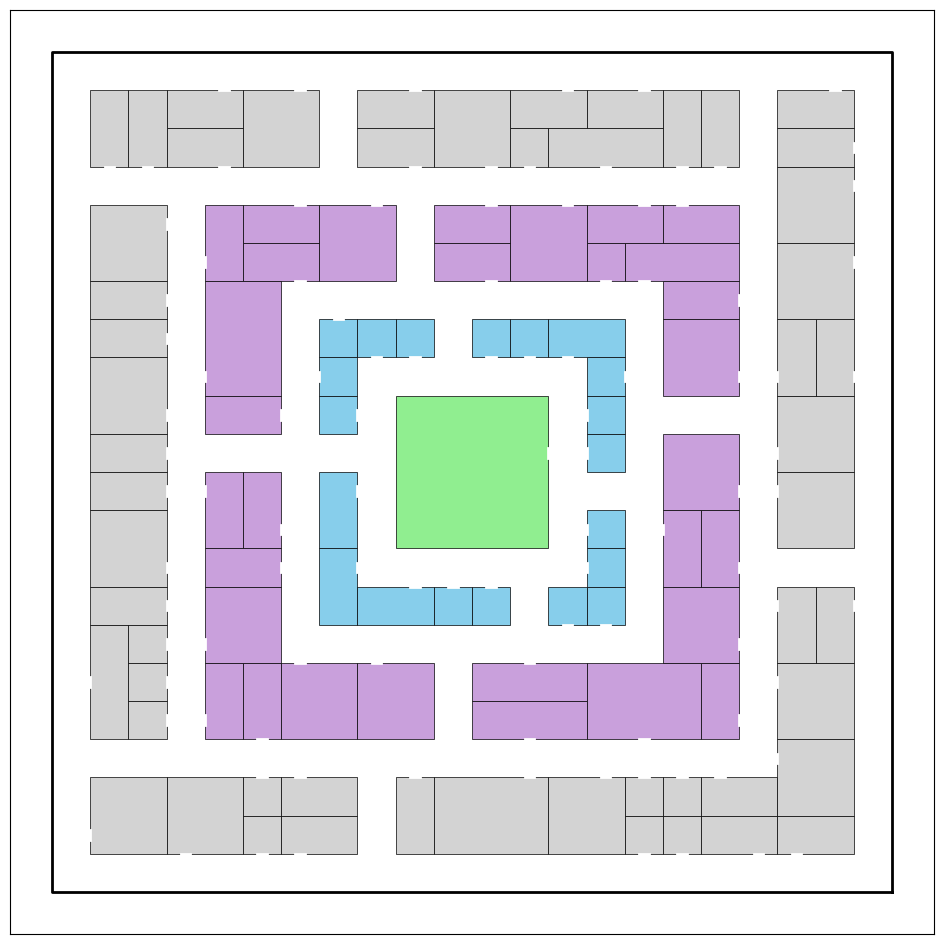

In [11]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 12))
city.plot_city(ax, doors=True, address=False)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('gc_empty.png')

In [5]:
# identify a building by its door coordinates and building type
print(city.buildings['r-x12-y3'].blocks)
city.buildings['r-x12-y3'].door_centroid

[(10, 1), (10, 2), (11, 1), (11, 2), (12, 1), (12, 2)]


(12.5, 3.0)

# Trajectory Simulation

Initialization of agent with pre-specified destination diary.

In [6]:
start_time = [datetime(2000, 1, 1, hour=0, minute=0) + timedelta(minutes=15*t) for t in range(22)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [15]*22  # in minutes
location = ['h-x8-y13'] * 2 + ['r-x12-y3'] * 4 + ['w-x15-y15'] * 12 + ['h-x8-y13'] * 4

destination = pd.DataFrame({"unix_timestamp":unix_timestamp,
                            "local_timestamp":start_time,
                            "duration":duration,
                            "location":location})
destination = mmod.condense_destinations(destination)

Duncan = Agent("Duncan",
               'h-x8-y13',
               'w-x15-y15',
               city,
               destination_diary=destination)

population.add_agent(Duncan)
population.generate_trajectory(Duncan, seed=100)

print(Duncan.diary)
#Duncan.trajectory

   unix_timestamp     local_timestamp  duration   location
0       946684800 2000-01-01 00:00:00        31   h-x8-y13
1       946686660 2000-01-01 00:31:00         6       None
2       946687020 2000-01-01 00:37:00        54   r-x12-y3
3       946690260 2000-01-01 01:31:00         7       None
4       946690680 2000-01-01 01:38:00       173  w-x15-y15
5       946701060 2000-01-01 04:31:00         4       None
6       946701300 2000-01-01 04:35:00        56   h-x8-y13


Initialization of agent with EPR-generated destination diary.

In [16]:
Thomas = Agent("Thomas",
               'h-x8-y8',
               'w-x18-y4',
               city,
               start_time=datetime(2024, 1, 1, hour=7, minute=0))

population.add_agent(Thomas)
population.generate_trajectory(Thomas, T=datetime(2024, 1, 1, hour=19, minute=0), dt=1)
#Thomas.trajectory

Agent identifier already exists in population. Replacing corresponding agent.


In [17]:
# custom version to generate the next plot

def sample_hier_nhpp(traj, beta_start, beta_durations, beta_ping, seed=None):
    if seed:
        npr.seed(seed)
    else:
        seed = npr.randint(0, 1000, 1)[0]
        npr.seed(seed)
        print("Seed:", seed)

    # Sample starting points of bursts
    inter_arrival_times = npr.exponential(scale=beta_start, size=len(traj))
    burst_start_points = np.cumsum(inter_arrival_times).astype(int)
    burst_start_points = burst_start_points[burst_start_points < len(traj)]

    # Sample durations of each burst
    burst_durations = np.random.exponential(scale=beta_durations, size=len(burst_start_points)).astype(int)

    # Create start_points and end_points
    burst_end_points = burst_start_points + burst_durations
    burst_end_points = np.minimum(burst_end_points, len(traj) - 1)

    # Adjust end_points to handle overlaps
    for i in range(len(burst_start_points) - 1):
        if burst_end_points[i] > burst_start_points[i + 1]:
            burst_end_points[i] = burst_start_points[i + 1]

    burst_info = pd.DataFrame(columns=['start_time', 'end_time'])

    # Sample pings within each burst
    sampled_trajectories = []
    burst_info = []
    for start, end in zip(burst_start_points, burst_end_points):
        start_time = traj.iloc[start]['local_timestamp']
        end_time = traj.iloc[end]['local_timestamp']
        entry = {'start_time': start_time,
                 'end_time': end_time}
        burst_info.append(entry)

        burst_indices = np.arange(start, end)

        if len(burst_indices) == 0:
            continue

        ping_intervals = np.random.exponential(scale=beta_ping, size=len(burst_indices))
        ping_times = np.unique(np.cumsum(ping_intervals).astype(int))
        ping_times = ping_times[ping_times < (end - start)] + start

        if len(ping_times) == 0:
            continue

        burst_data = traj.iloc[ping_times].copy()
        burst_data['first_ping'] = 0
        if not burst_data.empty:
            burst_data.iloc[0, burst_data.columns.get_loc('first_ping')] = 1

        sampled_trajectories.append(burst_data)

    if sampled_trajectories:
        sampled_traj = pd.concat(sampled_trajectories).sort_values(by='unix_timestamp')
    else:  # empty
        sampled_traj = pd.DataFrame(columns=list(traj.columns))

    burst_info = pd.DataFrame(burst_info)

    sampled_traj = sampled_traj.drop_duplicates('local_timestamp')

    return sampled_traj, burst_info

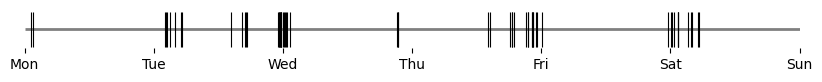

In [18]:
Thomas.sparse_traj, burst_info = sample_hier_nhpp(Thomas.trajectory, 720, 60, 20, seed=260)

fig, ax = plt.subplots(figsize=(10, 0.5))

ax.hlines(1, pd.Timestamp('2024-01-01 00:00'), pd.Timestamp('2024-01-07 00:00'), color='gray', linewidth=2)

# ax.vlines(burst_info['start_time'], 0.95, 1.05, color='red', linewidth=1.2, alpha=1)

# for i, row in burst_info.iterrows():
#     ax.fill_betweenx(
#         [0.95, 1.05],
#         row['start_time'],
#         row['end_time'],
#         color='lightgrey',
#         alpha=0.8,
#         zorder=1
#     )

ax.vlines(Thomas.sparse_traj['local_timestamp'], 0.95, 1.05, color='black', linewidth=0.8, alpha=1)

ax.set_xlim(pd.Timestamp('2024-01-01 00:00'), pd.Timestamp('2024-01-07 00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
plt.xticks(rotation=0)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.yaxis.set_visible(False)

#ax.set_title(f"N={len(Thomas.sparse_traj)}", fontsize=10, pad=10)
fig.savefig("nhpp-sampling.png")

plt.show()

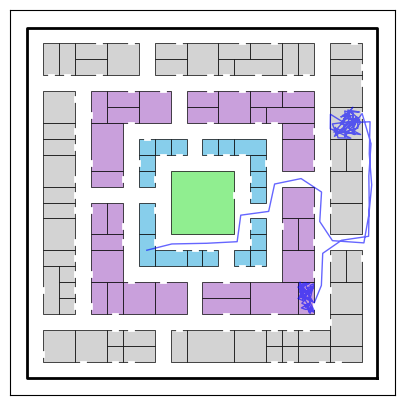

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.plot(Thomas.trajectory.x, Thomas.trajectory.y, linewidth=1, color='blue', alpha=0.6)
#Thomas.plot_traj(ax)

plt.savefig("garden-city-one-user.png")

In [ ]:
# Animation code

fig, ax = plt.subplots(figsize=(6, 6))

city.plot_city(ax, doors=True, address=True, zorder=1)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

line, = ax.plot([], [], color='blue', alpha=0.1)
scatter = ax.scatter([], [], s=8, color='black', alpha=0.5)
time_text = ax.text(0.5, 0.975, '', transform=ax.transAxes)

fade_length = 60  # Adjust this to control the length of the fade

df = Thomas.trajectory[6060:7500]  #[390:1390]


def update(i):
    if i < fade_length:
        current_fade_length = i + 1
    else:
        current_fade_length = fade_length
    alphas = np.array([np.exp(-0.5*x) for x in range(current_fade_length)][::-1])

    line.set_data(df['x'].iloc[:i], df['y'].iloc[:i])
    scatter.set_offsets(df[['x', 'y']].iloc[:i])
    scatter.set_alpha(np.pad(alphas, (i + 1 - current_fade_length, 0), 'constant'))
    time_text.set_text(df['local_timestamp'].iloc[i].strftime('%Y-%m-%d %H:%M:%S'))
    time_text.set_position((0.38, 0.965))
    time_text.set_fontsize(8)
    return line, scatter


anim = FuncAnimation(fig, update, frames=len(df), interval=50, blit=True)
anim.save('anim-epr.gif', writer=PillowWriter(fps=20))
plt.close(fig)

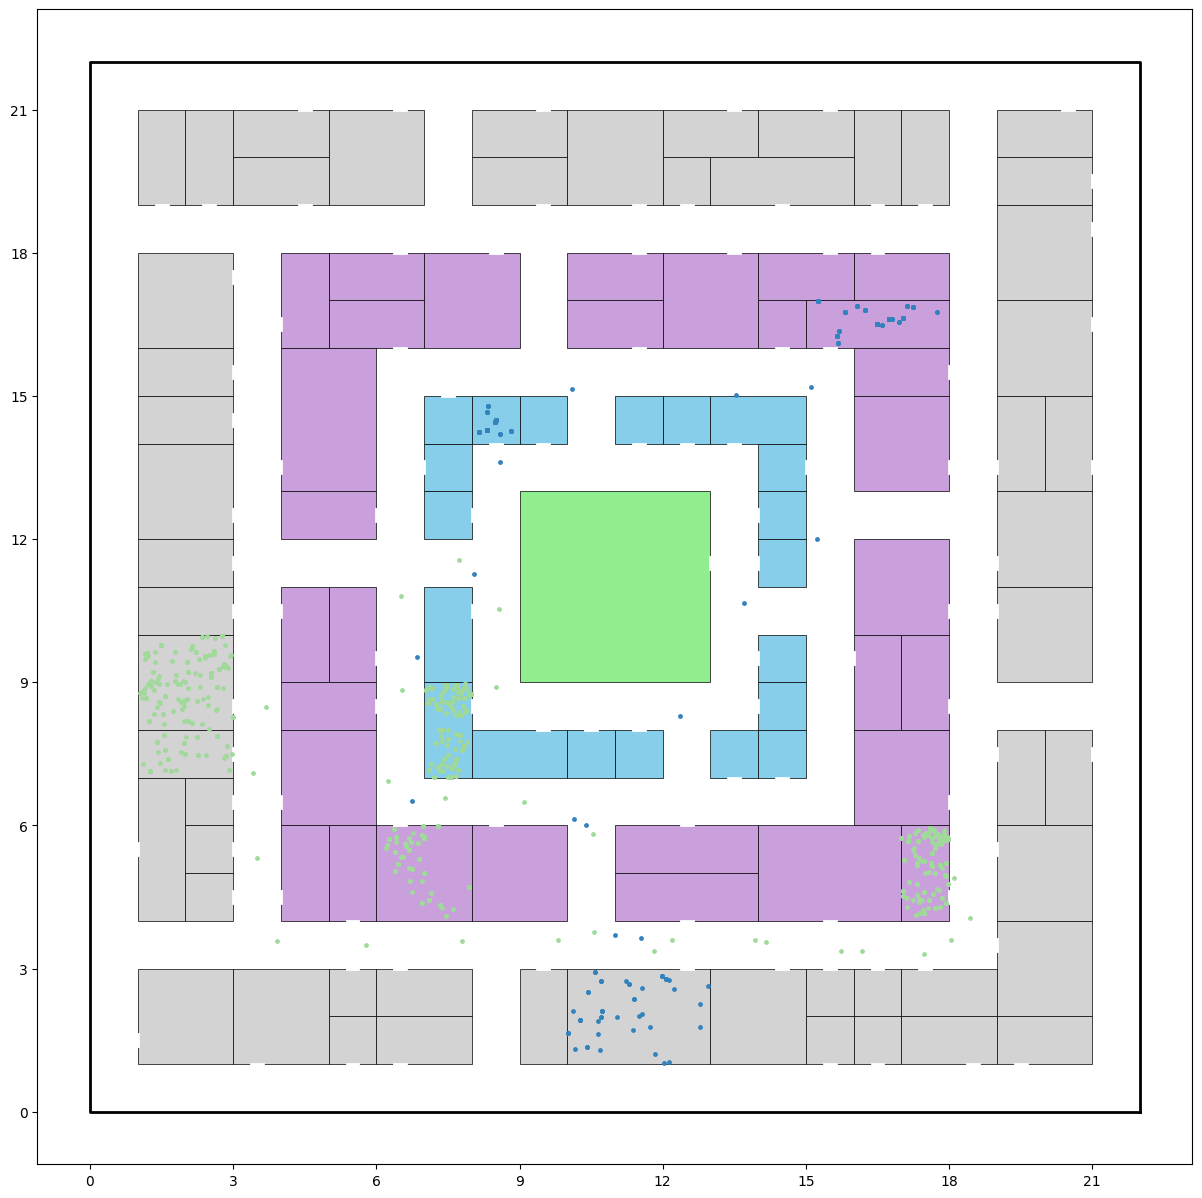

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
population.plot_population(ax, doors=True, address=False)

plt.savefig("garden-city-two-users.png")

In [26]:
population2 = Population(city)
population2.generate_agents(5, seed=100)

for i, agent_id in enumerate(population2.roster):
    agent = population2.roster[agent_id]
    population.generate_trajectory(agent, T=40, seed=100+i)

In [27]:
population2.roster

{'nifty_saha': <garden_city.Agent at 0x7f798df75a50>,
 'nostalgic_wing': <garden_city.Agent at 0x7f798df77460>,
 'optimistic_brahmagupta': <garden_city.Agent at 0x7f798df77be0>,
 'peaceful_gates': <garden_city.Agent at 0x7f798e31eda0>,
 'pedantic_kowalevski': <garden_city.Agent at 0x7f798df90910>}

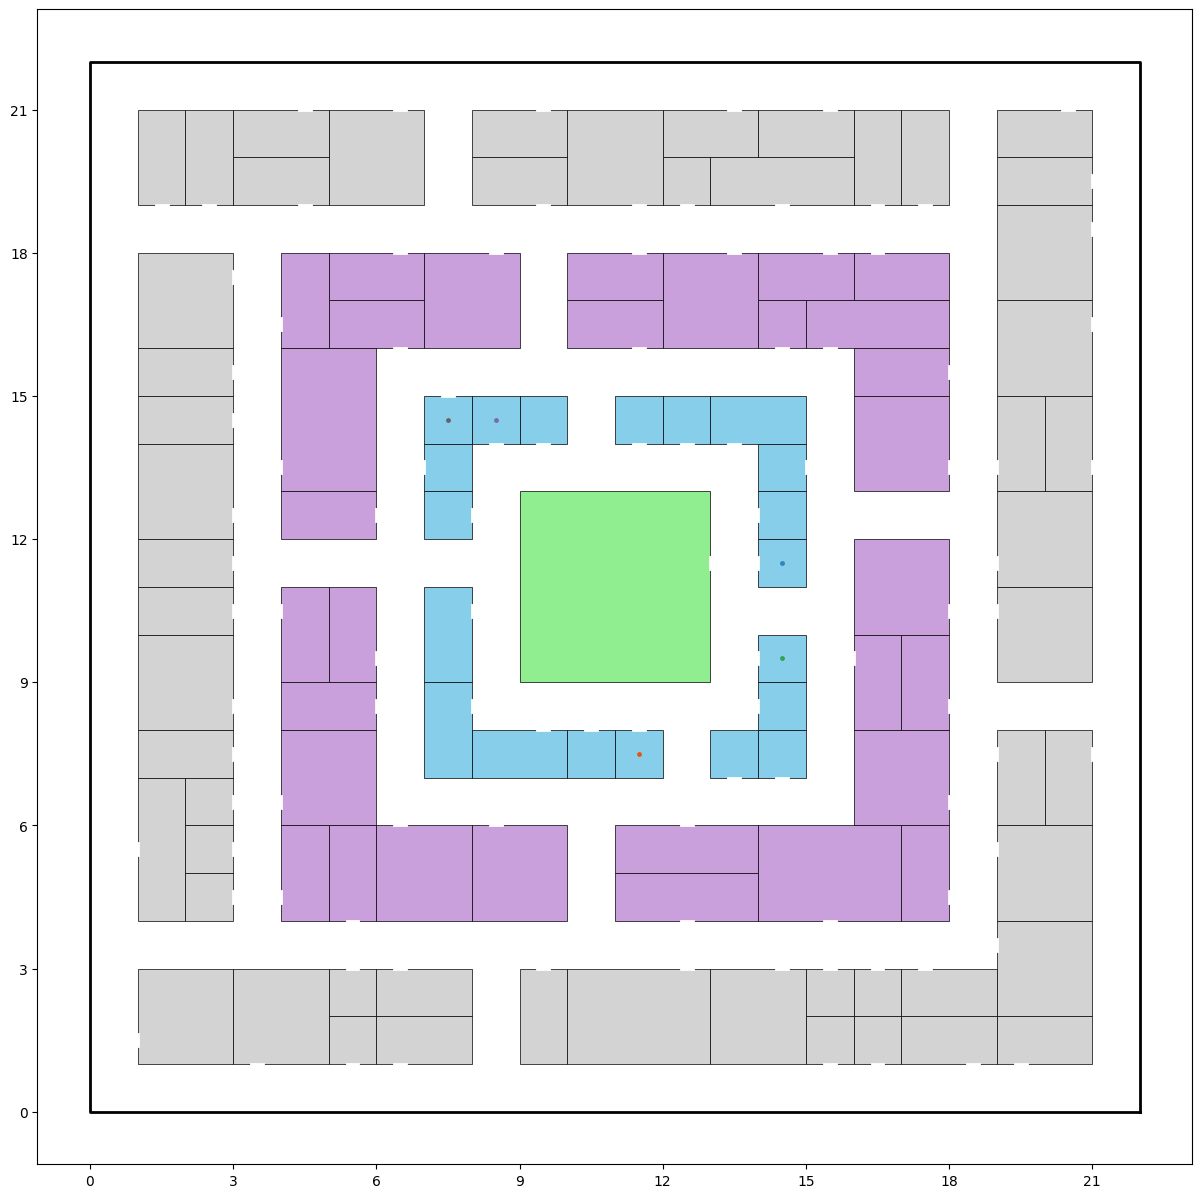

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
population2.plot_population(ax, doors=True, address=False)

# Demonstration: Clustering Algorithms

In [47]:
start_time = [datetime(2024, 6, 1, hour=0, minute=0) + timedelta(minutes=60*t) for t in range(5)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [60]*5  # in minutes

location = ['h-x13-y9'] * 1 + ['h-x13-y11'] * 1 + ['r-x18-y10'] * 3

destination = pd.DataFrame(
    {"unix_timestamp": unix_timestamp, "local_timestamp": start_time,
     "duration": duration, "location": location}
)
destination = mmod.condense_destinations(destination)

Angela = Agent("Angela",
               'h-x13-y9',
               'w-x18-y10',
               city,
               destination_diary=destination,
               dt=1)

#Angela.destination_diary

population.add_agent(Angela)
population.generate_trajectory(Angela, seed=60, dt=1)

Angela.diary

Agent identifier already exists in population. Replacing corresponding agent.


,unix_timestamp,local_timestamp,duration,location
0,1717200000,2024-06-01 00:00:00,61,h-x13-y9
1,1717203660,2024-06-01 01:01:00,2,None
2,1717203780,2024-06-01 01:03:00,58,h-x13-y11
3,1717207260,2024-06-01 02:01:00,4,None
4,1717207500,2024-06-01 02:05:00,176,r-x18-y10


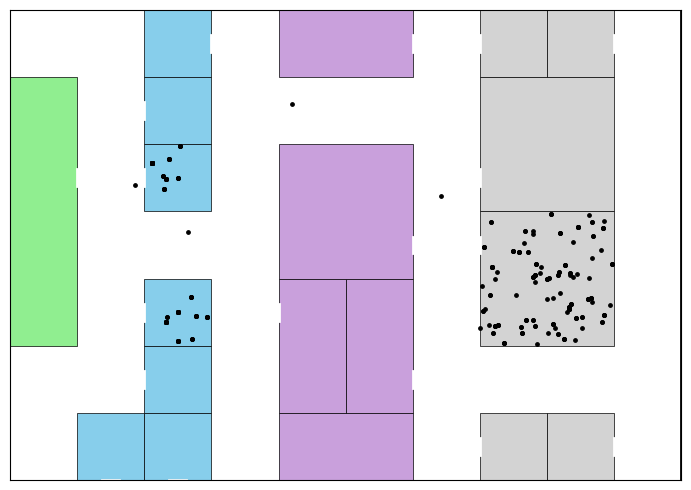

In [49]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(Angela.trajectory.x, Angela.trajectory.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

#plt.savefig("garden-city-one-user-full.png")

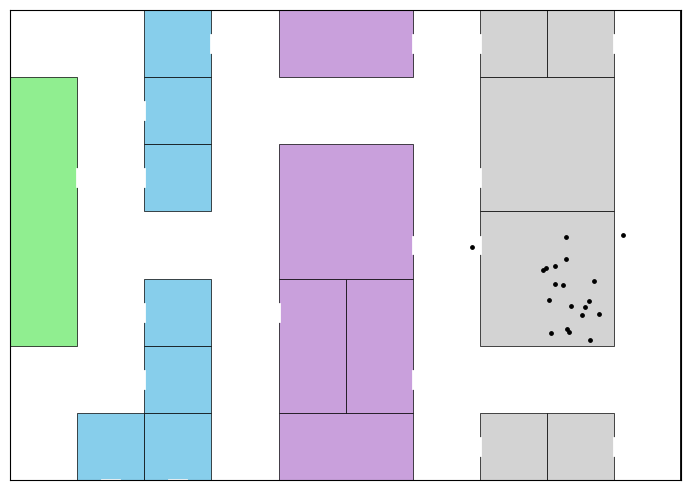

In [50]:
hier_nhpp_params = (90, 45, 3)
seed = 88
Angela.sample_traj_hier_nhpp(*hier_nhpp_params, seed=seed)

fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(Angela.sparse_traj.x, Angela.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

#plt.savefig("garden-city-one-user-sparse.png")

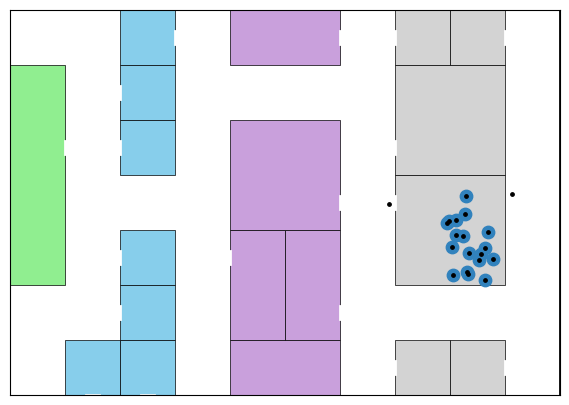

In [51]:
dbscan_params = [(120, 0.5, 2), (60, 0.5, 3)]
hier_nhpp_params = (90, 45, 3)
dbscan_out = sd.temporal_dbscan(Angela.sparse_traj, *dbscan_params[0])

fig, ax = plt.subplots(figsize=(9, 5))

num_clusters = sum(dbscan_out.cluster.unique() > -1)
for cid in range(num_clusters):
    cpings = dbscan_out[dbscan_out.cluster == cid]
    cdata = Angela.sparse_traj.loc[cpings.index]
    col = cm.tab20c(cid/(num_clusters+1))
    ax.scatter(cdata.x, cdata.y, s=80, color=col, alpha=1, zorder=2)

ax.scatter(Angela.sparse_traj.x, Angela.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.show()

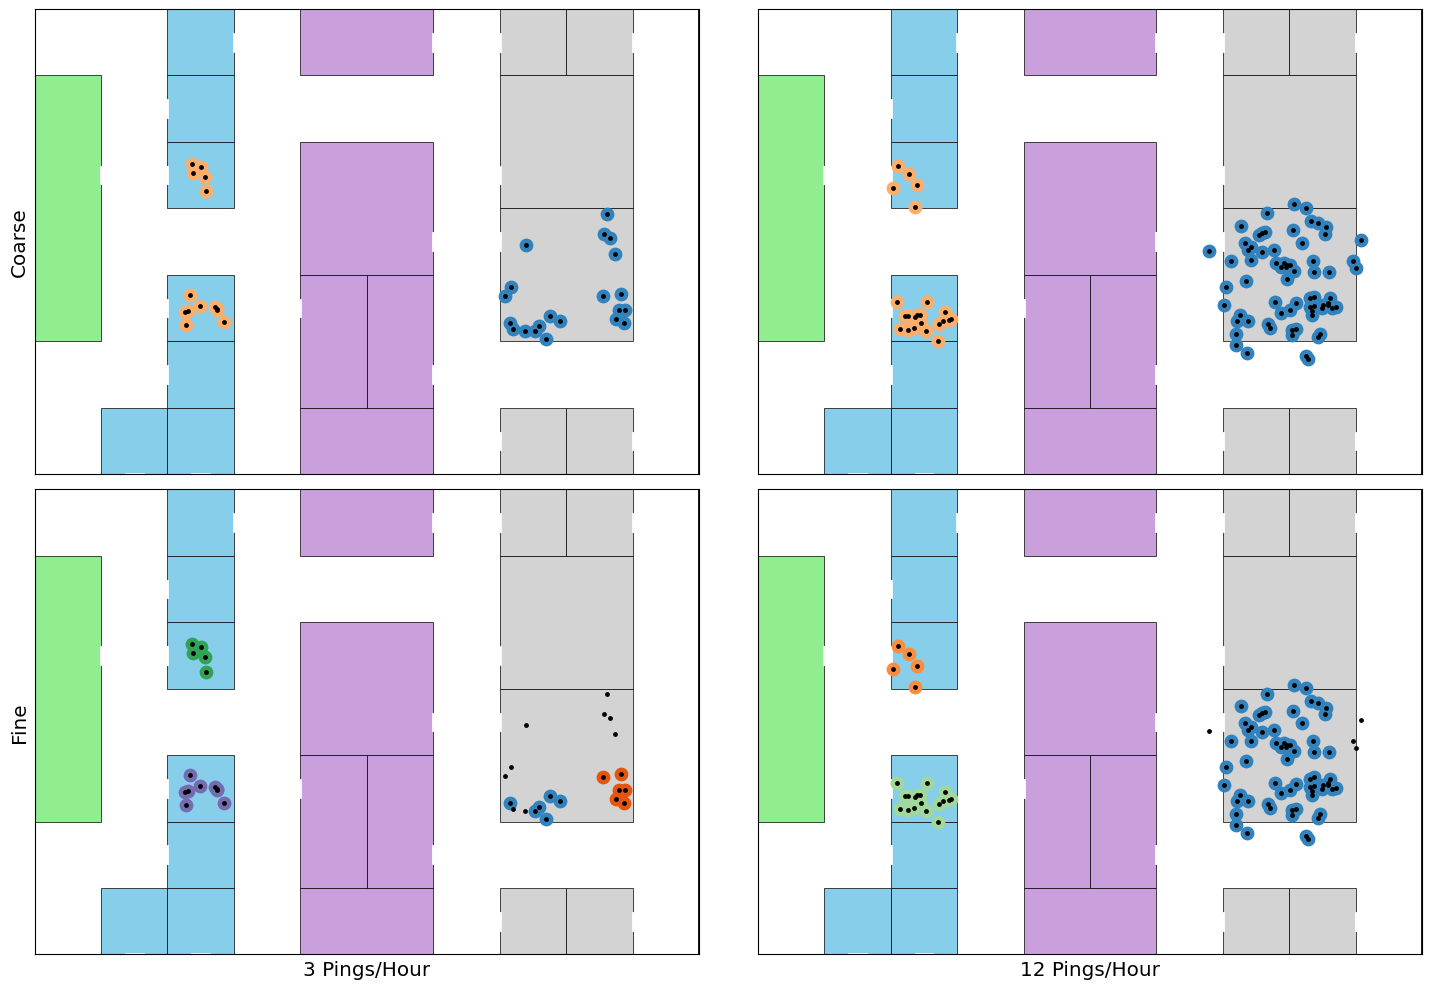

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
dbscan_params = [(240, 2, 2), (60, 0.5, 3)]
hier_nhpp_params = [(90, 30, 4), (60, 60, 2)]
seed = 60

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        Angela.sample_traj_hier_nhpp(*hier_nhpp_params[j], seed=seed)

        dbscan_out = sd.temporal_dbscan(Angela.sparse_traj, *dbscan_params[i])

        num_clusters = sum(dbscan_out.cluster.unique() > -1)
        for cid in range(num_clusters):
            cpings = dbscan_out[dbscan_out.cluster == cid]
            cdata = Angela.sparse_traj.loc[cpings.index]
            col = cm.tab20c(cid/(num_clusters+1))
            ax.scatter(cdata.x, cdata.y, s=80, color=col, alpha=1, zorder=2)

        ax.scatter(Angela.sparse_traj.x, Angela.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
        city.plot_city(ax, doors=True, address=False, zorder=1)

        ax.set_xlim(12, 22)
        ax.set_ylim(7, 14)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

axes[0, 0].set_ylabel('Coarse', fontsize='x-large')
axes[1, 0].set_ylabel('Fine', fontsize='x-large')
axes[1, 0].set_xlabel('3 Pings/Hour', fontsize='x-large')
axes[1, 1].set_xlabel('12 Pings/Hour', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-stdbscan.png")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
params = [(10, 120, 3), (10, 60, 2)]
hier_nhpp_params = [(90, 30, 4), (60, 60, 2)]
seed = 60

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        Angela.sample_traj_hier_nhpp(*hier_nhpp_params[j], seed=seed)

        lachesis_out = sd.lachesis_patches(Angela.sparse_traj, *params[i])

        for idx, data in enumerate(lachesis_out):
            col = cm.tab20c(idx/len(lachesis_out))
            ax.scatter(data.x, data.y, s=80, color=col, alpha=1, zorder=2)

        ax.scatter(Angela.sparse_traj.x, Angela.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
        city.plot_city(ax, doors=True, address=True, zorder=1)

        ax.set_xlim(12, 22)
        ax.set_ylim(7, 14)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

axes[0, 0].set_ylabel('Coarse', fontsize='x-large')
axes[1, 0].set_ylabel('Fine', fontsize='x-large')
axes[1, 0].set_xlabel('3 Pings/Hour', fontsize='x-large')
axes[1, 1].set_xlabel('12 Pings/Hour', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-lachesis.png")
plt.show()

Animation of pre-sampled trajectory for one users

In [48]:
fig, ax = plt.subplots(figsize=(9, 5))

city.plot_city(ax, doors=True, address=True, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

line, = ax.plot([], [], color='blue', alpha=0.1)
scatter = ax.scatter([], [], s=8, color='black', alpha=0.5)
time_text = ax.text(0.5, 0.975, '', transform=ax.transAxes)

fade_length = 60  # Adjust this to control the length of the fade

def update(i):
    if i < fade_length:
        current_fade_length = i + 1
    else:
        current_fade_length = fade_length
    alphas = np.array([np.exp(-0.5*x) for x in range(current_fade_length)][::-1])

    line.set_data(Angela.trajectory['x'][:i], Angela.trajectory['y'][:i])
    scatter.set_offsets(Angela.trajectory[['x', 'y']][:i])
    scatter.set_alpha(np.pad(alphas, (i + 1 - current_fade_length, 0), 'constant'))
    time_text.set_text(Angela.trajectory['local_timestamp'][i].strftime('%Y-%m-%d %H:%M:%S'))
    return line, scatter

anim = FuncAnimation(fig, update, frames=len(Angela.trajectory), interval=50, blit=True)
anim.save('garden-city-traj-animation.gif', writer=PillowWriter(fps=20))
plt.close(fig)